# Próximos pasos


1.   Ya tengo poblacion desde 1998, 2003, 2008, 2013, 2018, 2023, dividida por mujeres/hombres/total. Además tengo el pib del municipio.
2.   A ese archivo, poblacion_por_municipio_sexo_y_pib.csv, le tengo que agregar el codigo de provincia y el nombre de provincia.
3.  Armar un nuevo csv, con codigo_provincia, nombre_provincia, tasa_municipios_despoblados. Agregar los datos de 3996.csv Tasas de actividad, paro y empleo por provincia y sexo. https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176918&menu=ultiDatos&idp=1254735976595 . Años a incluir 2023, 2018, 2013, 2008, 2003. ambossexos_tasaparo_2023, y los demás años. Lo mismo para tasa de actividad, ambossexos_tasaactividad_2023, y los demás años. Lo mismo para tasa de empleo, ambossexos_tasaempleo_2023. Hasta ahora son 3 + 3*5 = 18 columnas.
4.  https://www.ine.es/dynt3/inebase/es/index.htm?padre=8423&capsel=8429
	indice precios de consumo. Indices provinciales 50918.csv
5.  https://www.ine.es/jaxi/Tabla.htm?path=/t35/p010/rev19/l0/&file=02001.px&L=0
	pib a precios de mercado. precios corrientes por provincias 02001.csv

Nota, puntos 1. 2. y 3. ya los tengo

In [ ]:
import io
import pandas as pd
from google.colab import files
import re

In [ ]:
uploaded = files.upload()

Saving Despoblamiento_tasaActividad_2023.csv to Despoblamiento_tasaActividad_2023.csv


In [ ]:
despoblamiento = pd.read_csv(io.BytesIO(uploaded.get('Despoblamiento_tasaActividad_2023.csv')), sep=";", encoding='utf8')

In [ ]:
despoblamiento.head()

codigo_provincia  nombre_provincia  %_desploblamiento_2023  \
0                 1       Araba/Álava                      80   
1                 2          Albacete                      73   
2                 3  Alicante/Alacant                      44   
3                 4           Almería                      62   
4                 5             Ávila                      94   

   ambossexos_tasaactividad_2023  ambossexos_tasaempleo_2023  \
0                         58.330                     54.3625   
1                         59.000                     51.9825   
2                         58.415                     50.6950   
3                         61.155                     51.4375   
4                         53.840                     47.5250   

   ambossexos_tasaparo_2023  hombres_tasaactividad_2023  \
0                    6.7975                     64.9350   
1                   11.8850                     66.1775   
2                   13.2225                     63.6825   
3                   15.8750                     67.6275   
4                   11.7200                     60.3700   

   hombres_tasaempleo_2023  hombres_tasaparo_2023  mujeres_tasaactividad_2023  \
0                  60.8375                 6.3000                     52.1525   
1                  59.7975                 9.6300                     51.9075   
2                  56.5400                11.2325                     53.3650   
3                  57.6250                14.7600                     54.5275   
4                  53.9725                10.5850                     47.2125   

   mujeres_tasaempleo_2023  mujeres_tasaparo_2023  
0                  48.3025                 7.3600  
1                  44.2650                14.7225  
2                  45.0925                15.5050  
3                  45.1000                17.3500  
4                  40.9750                13.1775

# Agrego 	3995.csv

In [ ]:
uploaded = files.upload()

Saving 3995.csv to 3995.csv


In [ ]:
ocupados = pd.read_csv(io.BytesIO(uploaded.get('3995.csv')), sep=";", encoding='utf8')

In [ ]:
ocupados['Total'] = ocupados['Total'].replace(',','.', regex=True).astype(float)

In [ ]:
ocupados_c = ocupados.copy()
print("ready")

ready


In [ ]:
ocupados_c.head()

Provincias Sector económico Periodo  Total
0  02 Albacete      Agricultura  2023T4   10.7
1  02 Albacete      Agricultura  2023T3    8.5
2  02 Albacete      Agricultura  2023T2    7.0
3  02 Albacete      Agricultura  2023T1    9.5
4  02 Albacete      Agricultura  2022T4    8.6

In [ ]:
cod_prov_a = []
nombre_prov_a = []
anio_a = []
periodo_a = []
pattern = '[0-9]+'
for i in range(len(ocupados_c)):
  texto_provincias = ocupados_c.loc[i,'Provincias']
  codigo = (re.findall(pattern, texto_provincias))[0] # separo el codigo de prov
  nombre = (re.sub(pattern, '', texto_provincias)).strip() # separo el nombre de prov
  texto_periodo = ocupados_c.loc[i,'Periodo']
  anio = (texto_periodo.split("T"))[0]
  periodo = (texto_periodo.split("T"))[1]
  cod_prov_a.append(int(codigo))
  nombre_prov_a.append(nombre)
  anio_a.append(int(anio))
  periodo_a.append(int(periodo))
print("ready")
ocupados_c.drop(['Provincias', 'Periodo'], axis=1, inplace=True)
ocupados_c.insert(0, "codigo_provincia",cod_prov_a)
ocupados_c.insert(1, "nombre_provincia",nombre_prov_a)
ocupados_c.insert(3, "anio",anio_a)
ocupados_c.insert(4, "periodo",periodo_a)
ocupados_c.sort_values(by=['codigo_provincia'], inplace=True)
ocupados_c.reset_index(inplace=True, drop=True)
ocupados_c.shape

ready


(13312, 6)

In [ ]:
ocupados_c.head()

codigo_provincia nombre_provincia Sector económico  anio  periodo  Total
0                 1      Araba/Álava        Servicios  2008        3   61.5
1                 1      Araba/Álava        Industria  2016        3   31.1
2                 1      Araba/Álava        Industria  2016        4   30.7
3                 1      Araba/Álava        Industria  2017        1   30.1
4                 1      Araba/Álava        Industria  2017        2   29.9

In [ ]:
agricultura_a = []
construccion_a = []
industria_a = []
servicio_a = []

for i in range(len(ocupados_c)):
  codigo_provincia = ocupados_c.loc[i,'codigo_provincia']
  if codigo_provincia != 0:
    ocu_agri = ocupados_c.loc[((ocupados_c['codigo_provincia'] == codigo_provincia) & (ocupados_c['Sector económico'] == 'Agricultura') & (ocupados_c['anio'] == 2023)), 'Total'].mean()
    ocu_const = ocupados_c.loc[((ocupados_c['codigo_provincia'] == codigo_provincia) & (ocupados_c['Sector económico'] == 'Construcción') & (ocupados_c['anio'] == 2023)), 'Total'].mean()
    ocu_ind = ocupados_c.loc[((ocupados_c['codigo_provincia'] == codigo_provincia) & (ocupados_c['Sector económico'] == 'Industria') & (ocupados_c['anio'] == 2023)), 'Total'].mean()
    ocu_serv = ocupados_c.loc[((ocupados_c['codigo_provincia'] == codigo_provincia) & (ocupados_c['Sector económico'] == 'Servicios') & (ocupados_c['anio'] == 2023)), 'Total'].mean()
    agricultura_a.append(float(ocu_agri))
    construccion_a.append(float(ocu_const))
    industria_a.append(float(ocu_ind))
    servicio_a.append(float(ocu_serv))
    # asigno 0 a todas las filas de esa provincia
    ocupados_c.loc[ocupados_c["codigo_provincia"] == codigo_provincia, "codigo_provincia"] = 0
print("ready")

ready


In [ ]:
despoblamiento.insert(12, "activos_agricultura_2023",agricultura_a)
despoblamiento.insert(13, "activos_construccion_2023",construccion_a)
despoblamiento.insert(14, "activos_industria_2023",industria_a)
despoblamiento.insert(15, "activos_servicios_2023",servicio_a)

despoblamiento.to_csv('Despoblamiento_tasaActividad_activosxsectoreconomico_2023.csv', index=False, sep=';', encoding='utf-8')

# Agrego Índices provinciales: general y de grupos ECOICOP
https://www.ine.es/dynt3/inebase/es/index.htm?padre=8423&capsel=8429
	 50918.csv

In [ ]:
uploaded = files.upload()

Saving 50918.csv to 50918.csv


In [ ]:
ipc = pd.read_csv(io.BytesIO(uploaded.get('50918.csv')), sep=";", encoding='utf-8')

In [ ]:
ipc.head()

Provincias  Grupos ECOICOP Tipo de dato  Periodo    Total
0   Nacional  Índice general       Índice  2024M01  113,404
1   Nacional  Índice general       Índice  2023M12  113,308
2   Nacional  Índice general       Índice  2023M11   113,28
3   Nacional  Índice general       Índice  2023M10  113,676
4   Nacional  Índice general       Índice  2023M09  113,348

In [ ]:
filter = ipc[ipc['Provincias'] == "Nacional" ]
ipc.drop(filter.index, axis=0,inplace=True)
filter1 = ipc[ipc['Grupos ECOICOP'] == "Índice general" ]
ipc.drop(filter1.index, axis=0,inplace=True)
filter2 = ipc[ipc['Total'] == ".." ]
ipc.drop(filter2.index, axis=0,inplace=True)
ipc['Total'] = ipc['Total'].replace(',','.', regex=True).astype(float)
indice_ipc = ipc[ipc['Tipo de dato'] == "Índice"]
indice_ipc.reset_index(inplace=True, drop=True)
indice_ipc.head()

Provincias                         Grupos ECOICOP Tipo de dato  Periodo  \
0  02 Albacete  01 Alimentos y bebidas no alcohólicas       Índice  2024M01   
1  02 Albacete  01 Alimentos y bebidas no alcohólicas       Índice  2023M12   
2  02 Albacete  01 Alimentos y bebidas no alcohólicas       Índice  2023M11   
3  02 Albacete  01 Alimentos y bebidas no alcohólicas       Índice  2023M10   
4  02 Albacete  01 Alimentos y bebidas no alcohólicas       Índice  2023M09   

     Total  
0  129.311  
1  128.695  
2  128.802  
3  127.909  
4  126.078

In [ ]:
indice_ipc.describe()

Total
count  165360.000000
mean       92.218679
std        14.259682
min        43.050000
25%        85.248000
50%        94.760000
75%       100.441000
max       139.199000

<ipython-input-45-feb80c450d8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  indice_ipc.groupby(['Grupos ECOICOP']).sum().plot(kind='pie', y='Total')


<Axes: ylabel='Total'>

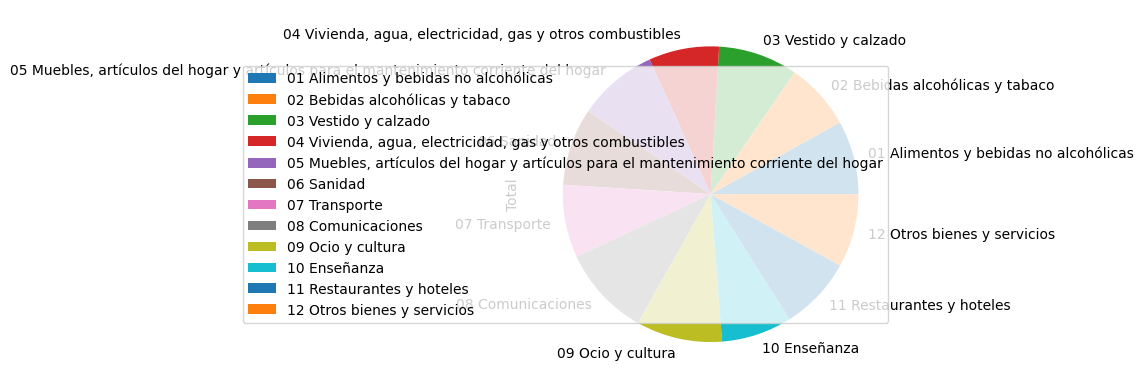

In [ ]:
indice_ipc.groupby(['Grupos ECOICOP']).sum().plot(kind='pie', y='Total')

<ipython-input-46-ce1b7c221f6c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  indice_ipc.groupby(['Grupos ECOICOP']).sum().plot(kind='bar', y='Total')


<Axes: xlabel='Grupos ECOICOP'>

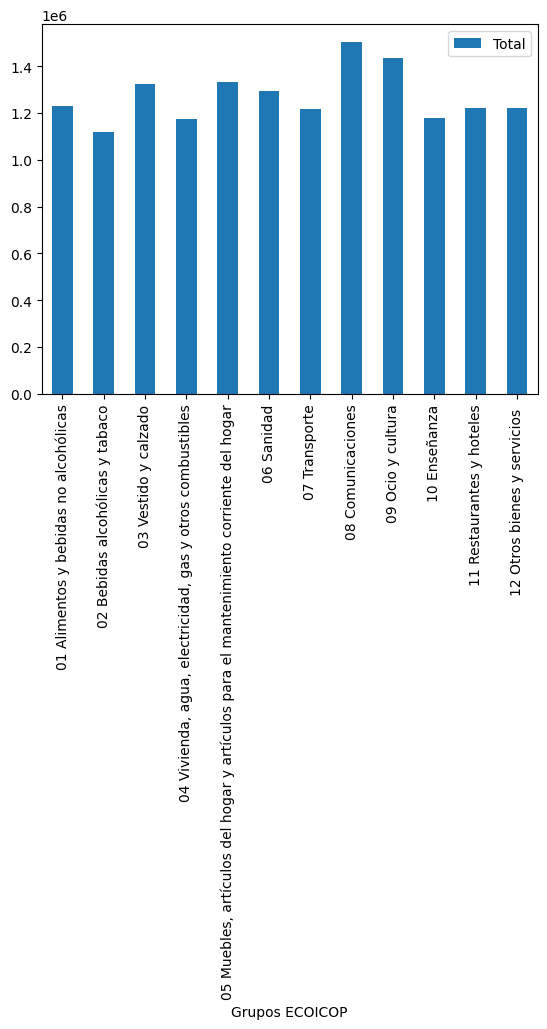

In [ ]:
indice_ipc.groupby(['Grupos ECOICOP']).sum().plot(kind='bar', y='Total')

In [ ]:
pd.unique(indice_ipc['Grupos ECOICOP'])

array(['01 Alimentos y bebidas no alcohólicas',
       '02 Bebidas alcohólicas y tabaco', '03 Vestido y calzado',
       '04 Vivienda, agua, electricidad, gas y otros combustibles',
       '05 Muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar',
       '06 Sanidad', '07 Transporte', '08 Comunicaciones',
       '09 Ocio y cultura', '10 Enseñanza', '11 Restaurantes y hoteles',
       '12 Otros bienes y servicios '], dtype=object)

In [ ]:
cod_prov_a = []
nombre_prov_a = []
anio_a = []
periodo_a = []
pattern = '[0-9]+'
for i in range(len(indice_ipc)):
  texto_provincias = indice_ipc.loc[i,'Provincias']
  codigo = (re.findall(pattern, texto_provincias))[0] # separo el codigo de prov
  nombre = (re.sub(pattern, '', texto_provincias)).strip() # separo el nombre de prov
  texto_periodo = indice_ipc.loc[i,'Periodo']
  anio = (texto_periodo.split("M"))[0]
  periodo = (texto_periodo.split("M"))[1]
  cod_prov_a.append(int(codigo))
  nombre_prov_a.append(nombre)
  anio_a.append(int(anio))
  periodo_a.append(int(periodo))
print("ready")
indice_ipc.drop(['Provincias', 'Periodo'], axis=1, inplace=True)
indice_ipc.insert(0, "codigo_provincia",cod_prov_a)
indice_ipc.insert(1, "nombre_provincia",nombre_prov_a)
indice_ipc.insert(4, "anio",anio_a)
indice_ipc.insert(5, "periodo",periodo_a)
indice_ipc.sort_values(by=['codigo_provincia'], inplace=True)
indice_ipc.reset_index(inplace=True, drop=True)
indice_ipc.shape

ready


<ipython-input-49-d40f0cc6e3c8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indice_ipc.drop(['Provincias', 'Periodo'], axis=1, inplace=True)
<ipython-input-49-d40f0cc6e3c8>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indice_ipc.sort_values(by=['codigo_provincia'], inplace=True)


(165360, 7)

In [ ]:
indice_ipc.head()

codigo_provincia nombre_provincia  \
0                 1      Araba/Álava   
1                 1      Araba/Álava   
2                 1      Araba/Álava   
3                 1      Araba/Álava   
4                 1      Araba/Álava   

                                      Grupos ECOICOP Tipo de dato  anio  \
0                       12 Otros bienes y servicios        Índice  2002   
1  05 Muebles, artículos del hogar y artículos pa...       Índice  2023   
2  05 Muebles, artículos del hogar y artículos pa...       Índice  2023   
3  05 Muebles, artículos del hogar y artículos pa...       Índice  2023   
4  05 Muebles, artículos del hogar y artículos pa...       Índice  2023   

   periodo    Total  
0        3   65.341  
1        8  112.699  
2        9  112.916  
3       10  113.024  
4       11  112.657

In [ ]:
file_c = indice_ipc.copy()

In [ ]:
alimentos_a = []
bebidasalc_a = []
vestido_a = []
vivienda_a = []
hogar_a = []
sanidad_a = []
transporte_a = []
comunicaciones_a = []
ocio_a = []
ensenianza_a = []
restaurantes_a = []
otrosbienesyserv_a = []

for i in range(len(file_c)):
  codigo_provincia = file_c.loc[i,'codigo_provincia']
  if codigo_provincia != 0:
    alimentos = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Grupos ECOICOP'] == '01 Alimentos y bebidas no alcohólicas') & (file_c['anio'] == 2023)), 'Total'].mean()
    bebidasalc = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Grupos ECOICOP'] == '02 Bebidas alcohólicas y tabaco') & (file_c['anio'] == 2023)), 'Total'].mean()
    vestido = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Grupos ECOICOP'] == '03 Vestido y calzado') & (file_c['anio'] == 2023)), 'Total'].mean()
    vivienda = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Grupos ECOICOP'] == '04 Vivienda, agua, electricidad, gas y otros combustibles') & (file_c['anio'] == 2023)), 'Total'].mean()
    hogar = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Grupos ECOICOP'] == '05 Muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar') & (file_c['anio'] == 2023)), 'Total'].mean()
    sanidad = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Grupos ECOICOP'] == '06 Sanidad') & (file_c['anio'] == 2023)), 'Total'].mean()
    transporte = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Grupos ECOICOP'] == '07 Transporte') & (file_c['anio'] == 2023)), 'Total'].mean()
    comunicaciones = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Grupos ECOICOP'] == '08 Comunicaciones') & (file_c['anio'] == 2023)), 'Total'].mean()
    ocio = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Grupos ECOICOP'] == '09 Ocio y cultura') & (file_c['anio'] == 2023)), 'Total'].mean()
    ensenianza = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Grupos ECOICOP'] == '10 Enseñanza') & (file_c['anio'] == 2023)), 'Total'].mean()
    restaurantes = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Grupos ECOICOP'] == '11 Restaurantes y hoteles') & (file_c['anio'] == 2023)), 'Total'].mean()
    otrosbienesyserv = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Grupos ECOICOP'] == '12 Otros bienes y servicios ') & (file_c['anio'] == 2023)), 'Total'].mean()

    alimentos_a.append(float(alimentos))
    bebidasalc_a.append(float(bebidasalc))
    vestido_a.append(float(vestido))
    vivienda_a.append(float(vivienda))
    hogar_a.append(float(hogar))
    sanidad_a.append(float(sanidad))
    transporte_a.append(float(transporte))
    comunicaciones_a.append(float(comunicaciones))
    ocio_a.append(float(ocio))
    ensenianza_a.append(float(ensenianza))
    restaurantes_a.append(float(restaurantes))
    otrosbienesyserv_a.append(float(otrosbienesyserv))

    # asigno 0 a todas las filas de esa provincia
    file_c.loc[file_c["codigo_provincia"] == codigo_provincia, "codigo_provincia"] = 0
print("ready")

ready


In [ ]:
uploaded = files.upload()

Saving Despoblamiento_tasaActividad_activosxsectoreconomico_2023.csv to Despoblamiento_tasaActividad_activosxsectoreconomico_2023.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded.get('Despoblamiento_tasaActividad_activosxsectoreconomico_2023.csv')), sep=";", encoding='utf-8')

In [ ]:
df.head()

codigo_provincia  nombre_provincia  %_desploblamiento_2023  \
0                 1       Araba/Álava                      80   
1                 2          Albacete                      73   
2                 3  Alicante/Alacant                      44   
3                 4           Almería                      62   
4                 5             Ávila                      94   

   ambossexos_tasaactividad_2023  ambossexos_tasaempleo_2023  \
0                         58.330                     54.3625   
1                         59.000                     51.9825   
2                         58.415                     50.6950   
3                         61.155                     51.4375   
4                         53.840                     47.5250   

   ambossexos_tasaparo_2023  hombres_tasaactividad_2023  \
0                    6.7975                     64.9350   
1                   11.8850                     66.1775   
2                   13.2225                     63.6825   
3                   15.8750                     67.6275   
4                   11.7200                     60.3700   

   hombres_tasaempleo_2023  hombres_tasaparo_2023  mujeres_tasaactividad_2023  \
0                  60.8375                 6.3000                     52.1525   
1                  59.7975                 9.6300                     51.9075   
2                  56.5400                11.2325                     53.3650   
3                  57.6250                14.7600                     54.5275   
4                  53.9725                10.5850                     47.2125   

   mujeres_tasaempleo_2023  mujeres_tasaparo_2023  activos_agricultura_2023  \
0                  48.3025                 7.3600                     1.700   
1                  44.2650                14.7225                     8.925   
2                  45.0925                15.5050                     2.125   
3                  45.1000                17.3500                    21.500   
4                  40.9750                13.1775                    10.175   

   activos_construccion_2023  activos_industria_2023  activos_servicios_2023  
0                      4.875                  28.050                  65.350  
1                      5.700                  14.325                  71.050  
2                      8.875                  13.550                  75.475  
3                      4.650                   8.275                  65.575  
4                      7.650                  10.825                  71.300

In [ ]:
df.shape

(52, 16)

In [ ]:
df.insert(15, "ipc_alimentos_2023",alimentos_a)
df.insert(16, "ipc_bebidas_2023",bebidasalc_a)
df.insert(17, "ipc_vestido_2023",vestido_a)
df.insert(18, "ipc_vivienda_2023",vivienda_a)
df.insert(19, "ipc_hogar_2023",hogar_a)
df.insert(20, "ipc_sanidad_2023",sanidad_a)
df.insert(21, "ipc_transporte_2023",transporte_a)
df.insert(22, "ipc_comunicaciones_2023",comunicaciones_a)
df.insert(23, "ipc_ocio_2023",ocio_a)
df.insert(24, "ipc_ensenianza_2023",ensenianza_a)
df.insert(25, "ipc_restaurantes_2023",restaurantes_a)
df.insert(26, "ipc_otrosbienesyserv_2023",otrosbienesyserv_a)

df.to_csv('Despoblamiento_tasaActividad_activosxsectoreconomico_ipcxgrupos_2023.csv', index=False, sep=';', encoding='utf-8')

In [ ]:
df.loc[((df['codigo_provincia'] == 17), 'activos_servicios_2023')]

16    71.975
Name: activos_servicios_2023, dtype: float64

# Agrego pib a precios de mercado. precios corrientes por provincias https://www.ine.es/jaxi/Tabla.htm?path=/t35/p010/rev19/l0/&file=02001.px&L=0 02001.csv

In [ ]:
uploaded = files.upload()

Saving 02001.csv to 02001.csv


In [ ]:
pib = pd.read_csv(io.BytesIO(uploaded.get('02001.csv')), sep=";", encoding='utf8')

In [ ]:
pib['Total'] = pib['Total'].astype(int)

In [ ]:
cod_prov_a = []
nombre_prov_a = []
pattern = '[0-9]+'
for i in range(len(pib)):
  texto_provincias = pib.loc[i,'Provincias']
  codigo = (re.findall(pattern, texto_provincias))[0] # separo el codigo de prov
  nombre = (re.sub(pattern, '', texto_provincias)).strip() # separo el nombre de prov
  cod_prov_a.append(int(codigo))
  nombre_prov_a.append(nombre)
print("ready")
pib.drop(['Provincias'], axis=1, inplace=True)
pib.insert(0, "codigo_provincia",cod_prov_a)
pib.insert(1, "nombre_provincia",nombre_prov_a)
pib.sort_values(by=['codigo_provincia'], inplace=True)
pib.reset_index(inplace=True, drop=True)
pib.head()

ready


codigo_provincia nombre_provincia  \
0                 1      Araba/Álava   
1                 1      Araba/Álava   
2                 1      Araba/Álava   
3                 1      Araba/Álava   
4                 1      Araba/Álava   

                                  Ramas de actividad  periodo     Total  
0       PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO     2018  12740333  
1  G_J. Comercio al por mayor y al por menor, rep...     2021   1946392  
2                                    F. Construcción     2016    346285  
3                                    F. Construcción     2017    484790  
4                                    F. Construcción     2018    495851

In [ ]:
pd.unique(pib['Ramas de actividad'])

array(['PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO',
       'G_J. Comercio al por mayor y al por menor, reparación de vehículos de motor y motocicletas, transporte y almacenamiento, hostelería, información y comunicaciones',
       'F. Construcción', 'C. - De las cuales: Industria manufacturera',
       'B_E. Industrias extractivas, industria manufacturera, suministro de energía eléctrica, gas, vapor y aire acondicionado, suministro de agua, actividades de saneamiento, gestión de residuos y descontaminación',
       'A. Agricultura, ganadería, silvicultura y pesca',
       'Impuestos netos sobre los productos', 'Valor añadido bruto total',
       'O_U. Administración pública y defensa, seguridad social obligatoria, educación, actividades sanitarias y de servicios sociales, actividades artísticas, recreativas y de entretenimiento, reparación de artículos de uso doméstico y otros servicios',
       'K_N. Actividades financieras y de seguros, actividades inmobiliarias, actividades profe

In [ ]:
file_c = pib.copy()

In [ ]:
pib_preciosmercado_a = []
a_a = []
b_e_a = []
c_a = []
f_a = []
g_j_a = []
k_n_a = []
o_u_a = []
valoraniadido_a = []
impnetos_a = []

for i in range(len(file_c)):
  codigo_provincia = file_c.loc[i,'codigo_provincia']
  if codigo_provincia != 0:
    pib_preciosmercado = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Ramas de actividad'] == 'PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO') & (file_c['periodo'] == 2021)), 'Total'].iloc[0]
    a = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Ramas de actividad'] == 'A. Agricultura, ganadería, silvicultura y pesca') & (file_c['periodo'] == 2021)), 'Total']
    b_e = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Ramas de actividad'] == 'B_E. Industrias extractivas, industria manufacturera, suministro de energía eléctrica, gas, vapor y aire acondicionado, suministro de agua, actividades de saneamiento, gestión de residuos y descontaminación') & (file_c['periodo'] == 2021)), 'Total']
    c = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Ramas de actividad'] == 'C. - De las cuales: Industria manufacturera') & (file_c['periodo'] == 2021)), 'Total']
    f = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Ramas de actividad'] == 'F. Construcción') & (file_c['periodo'] == 2021)), 'Total']
    g_j = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Ramas de actividad'] == 'G_J. Comercio al por mayor y al por menor, reparación de vehículos de motor y motocicletas, transporte y almacenamiento, hostelería, información y comunicaciones') & (file_c['periodo'] == 2021)), 'Total']
    k_n = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Ramas de actividad'] == 'K_N. Actividades financieras y de seguros, actividades inmobiliarias, actividades profesionales, científicas y técnicas, actividades administrativas y servicios auxiliares') & (file_c['periodo'] == 2021)), 'Total']
    o_u = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Ramas de actividad'] == 'O_U. Administración pública y defensa, seguridad social obligatoria, educación, actividades sanitarias y de servicios sociales, actividades artísticas, recreativas y de entretenimiento, reparación de artículos de uso doméstico y otros servicios') & (file_c['periodo'] == 2021)), 'Total']
    valoraniadido = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Ramas de actividad'] == 'Valor añadido bruto total') & (file_c['periodo'] == 2021)), 'Total']
    impnetos = file_c.loc[((file_c['codigo_provincia'] == codigo_provincia) & (file_c['Ramas de actividad'] == 'Impuestos netos sobre los productos') & (file_c['periodo'] == 2021)), 'Total']

    pib_preciosmercado_a.append(int(pib_preciosmercado))
    a_a.append(int(a))
    b_e_a.append(int(b_e))
    c_a.append(int(c))
    f_a.append(int(f))
    g_j_a.append(int(g_j))
    k_n_a.append(int(k_n))
    o_u_a.append(int(o_u))
    valoraniadido_a.append(int(valoraniadido))
    impnetos_a.append(int(impnetos))

    # asigno 0 a todas las filas de esa provincia
    file_c.loc[file_c["codigo_provincia"] == codigo_provincia, "codigo_provincia"] = 0
print("ready")

ready


In [ ]:
print(len(pib_preciosmercado_a))
print(len(c_a))
print(len(k_n_a))
print(len(impnetos_a))

52
52
52
52


In [ ]:
uploaded = files.upload()

Saving Despoblamiento_tasaActividad_activosxsectoreconomico_ipcxgrupos_2023.csv to Despoblamiento_tasaActividad_activosxsectoreconomico_ipcxgrupos_2023 (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded.get('Despoblamiento_tasaActividad_activosxsectoreconomico_ipcxgrupos_2023 (1).csv')), sep=";", encoding='utf-8')

In [ ]:
df.head()

codigo_provincia  nombre_provincia  %_desploblamiento_2023  \
0                 1       Araba/Álava                      80   
1                 2          Albacete                      73   
2                 3  Alicante/Alacant                      44   
3                 4           Almería                      62   
4                 5             Ávila                      94   

   ambossexos_tasaactividad_2023  ambossexos_tasaempleo_2023  \
0                         58.330                     54.3625   
1                         59.000                     51.9825   
2                         58.415                  50695.0000   
3                      61155.000                     51.4375   
4                         53.840                  47525.0000   

   ambossexos_tasaparo_2023  hombres_tasaactividad_2023  \
0                    6.7975                  64935.0000   
1                11885.0000                     66.1775   
2                   13.2225                     63.6825   
3                   15.8750                     67.6275   
4                   11.7200                     60.3700   

   hombres_tasaempleo_2023  hombres_tasaparo_2023  mujeres_tasaactividad_2023  \
0                  60.8375                 6.3000                     52.1525   
1                  59.7975                 9.6300                     51.9075   
2                  56.5400                11.2325                  53365.0000   
3                  57.6250                14.7600                     54.5275   
4                  53.9725             10585.0000                     47.2125   

   ...  ipc_vestido_2023  ipc_vivienda_2023  ipc_hogar_2023  ipc_sanidad_2023  \
0  ...        100.987083         100.954083      112.348833        102.986667   
1  ...        106.550417         105.056500      110.649667        100.647667   
2  ...        106.785917          99.050667      111.751417        102.822250   
3  ...        102.373917         101.343833      109.399917        102.993167   
4  ...        104.293417         109.173083      111.876417        103.973667   

   ipc_transporte_2023  ipc_comunicaciones_2023  ipc_ocio_2023  \
0           112.539167               101.793833     107.497500   
1           112.926333               102.152083     107.019750   
2           114.182417               101.773083     107.639833   
3           111.782500               102.339500     106.229333   
4           112.434000               102.024750     106.289250   

   ipc_ensenianza_2023  ipc_restaurantes_2023  ipc_otrosbienesyserv_2023  
0        102219.000000             112.595750                 109.398833  
1           105.417167             116.275417                 109.242333  
2           103.411333             113.391000                 109.615417  
3           103.669333             113.725583                 108.123583  
4        101411.000000             119.177250                 108.437667  

[5 rows x 28 columns]

In [ ]:
df.shape

(52, 28)

In [ ]:
df.insert(28, "pib_precios_mercado_2021",pib_preciosmercado_a)
df.insert(29, "pib_agricultura_2021",a_a)
df.insert(30, "pib_industria_extrac_2021",b_e_a)
df.insert(31, "pib_industria_manufac_2021",c_a)
df.insert(32, "pib_construccion_2021",f_a)
df.insert(33, "pib_comercio_2021",g_j_a)
df.insert(34, "pib_act_financieras_2021",k_n_a)
df.insert(35, "pib_administracion_2021",o_u_a)
df.insert(36, "pib_valor_bruto_2021",valoraniadido_a)
df.insert(37, "pib_impuestos_netos_2021",impnetos_a)

df.to_csv('Despoblamiento_tasaActividad_activosxsectoreconomico_ipcxgrupos_pib_2023.csv', index=False, sep=';', encoding='utf-8')

# Agrego poblacion para el 2023

In [ ]:
import io
import pandas as pd
from google.colab import files
import re

In [ ]:
uploaded = files.upload()

Saving poblacion_por_municipio_y_sexo.csv to poblacion_por_municipio_y_sexo.csv


In [ ]:
poblacion = pd.read_csv(io.BytesIO(uploaded.get('poblacion_por_municipio_y_sexo.csv')), sep=";", encoding='utf8')

In [ ]:
#poblacion = poblacion.sort_values('codigo_provincia')
poblacion['mujeres_2023'] = poblacion['mujeres_2023'].astype(int)
poblacion['hombres_2023'] = poblacion['hombres_2023'].astype(int)
poblacion['total_2023'] = poblacion['total_2023'].astype(int)

In [ ]:
poblacion.head()

codigo_provincia nombre_provincia  codigo_municipio     nombre_municipio  \
0                 1      Araba/Álava              1051  Agurain/Salvatierra   
1                 1      Araba/Álava              1001     Alegría-Dulantzi   
2                 1      Araba/Álava              1002              Amurrio   
3                 1      Araba/Álava              1049                Añana   
4                 1      Araba/Álava              1003              Aramaio   

   mujeres_2023  hombres_2023  total_2023  despoblado_2023  mujeres_2018  \
0        2502.0        2583.0      5085.0            False        2521.0   
1        1436.0        1539.0      2975.0            False        1380.0   
2        5179.0        5134.0     10313.0            False        5211.0   
3          61.0          95.0       156.0             True          64.0   
4         677.0         732.0      1409.0             True         709.0   

   hombres_2018  ...  total_2008  despoblado_2008  mujeres_2003  hombres_2003  \
0        2497.0  ...      4628.0            False        2045.0        1999.0   
1        1507.0  ...      2467.0            False         822.0         885.0   
2        5075.0  ...     10027.0            False        4812.0        4743.0   
3          87.0  ...       176.0             True          88.0          97.0   
4         774.0  ...      1489.0             True         700.0         789.0   

   total_2003  despoblado_2003  mujeres_1998  hombres_1998  total_1998  \
0      4044.0            False        1936.0        1940.0      3876.0   
1      1707.0             True         603.0         656.0      1259.0   
2      9555.0            False        4899.0        4854.0      9753.0   
3       185.0             True          91.0          94.0       185.0   
4      1489.0             True         644.0         721.0      1365.0   

   despoblado_1998  
0            False  
1             True  
2            False  
3             True  
4             True  

[5 rows x 28 columns]

In [ ]:
print(poblacion.loc[(poblacion['codigo_provincia'] == 13), 'mujeres_2023'].sum())
print(poblacion.loc[(poblacion['codigo_provincia'] == 14), 'hombres_2023'].sum()) # 44 teruel
print(poblacion.loc[(poblacion['codigo_provincia'] == 21), 'total_2023'].sum()) # 20 gipuzkoa
print(poblacion.loc[(poblacion['codigo_provincia'] == 15), 'total_2023'].sum()) # 14 cordoba
print(poblacion.loc[(poblacion['codigo_provincia'] == 36), 'hombres_2023'].sum()) #35 palmas, las

247909.0
378791.0
530824.0
1123426.0
455309.0


In [ ]:
#poblacion.to_csv('poblacion_por_municipio_y_sexo.csv', index=False, sep=';', encoding='utf-8')

In [ ]:
file_c = poblacion.copy()
print("ready")

ready


In [ ]:
uploaded = files.upload()

Saving despob_actividad_activos_ipc_pib_2023.csv to despob_actividad_activos_ipc_pib_2023 (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded.get('despob_actividad_activos_ipc_pib_2023 (1).csv')), sep=";", encoding='utf-8')

In [ ]:
df.insert(3, "pob_total_2023",0)
df.insert(4, "pob_hombres_2023",0)
df.insert(5, "pob_mujeres_2023",0)

In [ ]:
for i in range(0, len(file_c)):
  codigo_provincia = file_c.loc[i, 'codigo_provincia']
  if codigo_provincia != 0:
    total = int(file_c.loc[(file_c['codigo_provincia'] == codigo_provincia), 'total_2023'].sum())
    hombres = int(file_c.loc[(file_c['codigo_provincia'] == codigo_provincia), 'hombres_2023'].sum())
    mujeres = int(file_c.loc[(file_c['codigo_provincia'] == codigo_provincia), 'mujeres_2023'].sum())
    #pob_total_a.append(total)
    #pob_hombres_a.append(hombres)
    #pob_mujeres_a.append(mujeres)
    df.loc[df['codigo_provincia'] == codigo_provincia, 'pob_total_2023'] = total
    df.loc[df['codigo_provincia'] == codigo_provincia, 'pob_hombres_2023'] = hombres
    df.loc[df['codigo_provincia'] == codigo_provincia, 'pob_mujeres_2023'] = mujeres

    if codigo_provincia == 15:
      print("prov 15 - corunia - " + str(total))
    elif codigo_provincia == 21:
      print("prov 21 huelva - " + str(total))
    elif codigo_provincia == 36:
        print("prov 36 pontevedra - " + str(hombres))

    # asigno 0 a todas las filas de esa provincia
    file_c.loc[file_c["codigo_provincia"] == codigo_provincia, "codigo_provincia"] = 0
print("ready")

prov 15 - corunia - 1123426
prov 21 huelva - 530824
prov 36 pontevedra - 455309
ready


In [ ]:
df.to_csv('despob_pob_actividad_activos_ipc_pib_2023.csv', index=False, sep=';', encoding='utf-8')